# Mount Drive

### New Section

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# cd to your project

In [ ]:
ls

### Resume checkpoint

In [ ]:
# path = "to your project"

In [ ]:
import os
import re

def get_latest_checkpoint(checkpoint_dir):
    checkpoints = [d for d in os.listdir(checkpoint_dir) if d.startswith("checkpoint-")]
    if not checkpoints:
        return None

    # ดึงเลขที่ตามหลัง checkpoint แล้วเรียงจากมากไปน้อย
    checkpoints = sorted(checkpoints, key=lambda x: int(re.findall(r"\d+", x)[0]), reverse=True)
    latest_checkpoint = os.path.join(checkpoint_dir, checkpoints[0])
    return latest_checkpoint


In [ ]:
latest_checkpoint = get_latest_checkpoint(path)

if latest_checkpoint:
    print(f"Resuming from: {latest_checkpoint}")
    model = VisionEncoderDecoderModel.from_pretrained(latest_checkpoint)
else:
    print("No checkpoint found. Starting from pre-trained model.")
    model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-small-stage1")


Resuming from: /content/drive/MyDrive/Sit.kmutt/Semester-4/SED690/Assignments/Final_project/thai_trocr_model_small/checkpoint-2710


Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_

# Install and load libraries

In [ ]:
# ติดตั้ง libraries
!pip install datasets transformers evaluate accelerate torchvision jiwer

In [ ]:
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, Seq2SeqTrainer, Seq2SeqTrainingArguments
from datasets import load_dataset
from torch.utils.data import DataLoader
import evaluate
from PIL import Image
import numpy as np

# Data Preparation

In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("iapp/thai_handwriting_dataset")

Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

In [ ]:
from datasets import load_dataset

dataset = load_dataset("iapp/thai_handwriting_dataset", split="train[:5000]")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

train-0000.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

train-0001.parquet:   0%|          | 0.00/88.7M [00:00<?, ?B/s]

train-0002.parquet:   0%|          | 0.00/91.2M [00:00<?, ?B/s]

train-0003.parquet:   0%|          | 0.00/83.0M [00:00<?, ?B/s]

train-0004.parquet:   0%|          | 0.00/76.5M [00:00<?, ?B/s]

train-0005.parquet:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

train-0006.parquet:   0%|          | 0.00/82.1M [00:00<?, ?B/s]

train-0007.parquet:   0%|          | 0.00/76.7M [00:00<?, ?B/s]

train-0008.parquet:   0%|          | 0.00/88.6M [00:00<?, ?B/s]

train-0009.parquet:   0%|          | 0.00/87.6M [00:00<?, ?B/s]

train-0010.parquet:   0%|          | 0.00/74.2M [00:00<?, ?B/s]

train-0011.parquet:   0%|          | 0.00/98.2M [00:00<?, ?B/s]

train-0012.parquet:   0%|          | 0.00/91.2M [00:00<?, ?B/s]

train-0013.parquet:   0%|          | 0.00/90.5M [00:00<?, ?B/s]

train-0014.parquet:   0%|          | 0.00/89.6M [00:00<?, ?B/s]

train-0015.parquet:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

train-0016.parquet:   0%|          | 0.00/80.2M [00:00<?, ?B/s]

train-0017.parquet:   0%|          | 0.00/83.8M [00:00<?, ?B/s]

train-0018.parquet:   0%|          | 0.00/77.0M [00:00<?, ?B/s]

train-0019.parquet:   0%|          | 0.00/99.9M [00:00<?, ?B/s]

train-0020.parquet:   0%|          | 0.00/91.8M [00:00<?, ?B/s]

train-0021.parquet:   0%|          | 0.00/88.8M [00:00<?, ?B/s]

train-0022.parquet:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

train-0023.parquet:   0%|          | 0.00/80.4M [00:00<?, ?B/s]

train-0024.parquet:   0%|          | 0.00/85.6M [00:00<?, ?B/s]

train-0025.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

train-0026.parquet:   0%|          | 0.00/85.5M [00:00<?, ?B/s]

train-0027.parquet:   0%|          | 0.00/82.9M [00:00<?, ?B/s]

train-0028.parquet:   0%|          | 0.00/78.1M [00:00<?, ?B/s]

train-0029.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

train-0030.parquet:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

train-0031.parquet:   0%|          | 0.00/84.3M [00:00<?, ?B/s]

train-0032.parquet:   0%|          | 0.00/81.9M [00:00<?, ?B/s]

train-0033.parquet:   0%|          | 0.00/80.8M [00:00<?, ?B/s]

train-0034.parquet:   0%|          | 0.00/81.8M [00:00<?, ?B/s]

train-0035.parquet:   0%|          | 0.00/106M [00:00<?, ?B/s]

train-0036.parquet:   0%|          | 0.00/93.3M [00:00<?, ?B/s]

train-0037.parquet:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

train-0038.parquet:   0%|          | 0.00/76.3M [00:00<?, ?B/s]

train-0039.parquet:   0%|          | 0.00/85.4M [00:00<?, ?B/s]

train-0040.parquet:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

train-0041.parquet:   0%|          | 0.00/83.2M [00:00<?, ?B/s]

train-0042.parquet:   0%|          | 0.00/84.6M [00:00<?, ?B/s]

train-0043.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

train-0044.parquet:   0%|          | 0.00/79.7M [00:00<?, ?B/s]

train-0045.parquet:   0%|          | 0.00/80.8M [00:00<?, ?B/s]

train-0046.parquet:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

train-0047.parquet:   0%|          | 0.00/80.0M [00:00<?, ?B/s]

train-0048.parquet:   0%|          | 0.00/90.6M [00:00<?, ?B/s]

train-0049.parquet:   0%|          | 0.00/98.4M [00:00<?, ?B/s]

train-0050.parquet:   0%|          | 0.00/103M [00:00<?, ?B/s]

train-0051.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

train-0052.parquet:   0%|          | 0.00/83.9M [00:00<?, ?B/s]

train-0053.parquet:   0%|          | 0.00/93.9M [00:00<?, ?B/s]

train-0054.parquet:   0%|          | 0.00/86.8M [00:00<?, ?B/s]

train-0055.parquet:   0%|          | 0.00/80.2M [00:00<?, ?B/s]

train-0056.parquet:   0%|          | 0.00/73.7M [00:00<?, ?B/s]

train-0057.parquet:   0%|          | 0.00/77.2M [00:00<?, ?B/s]

train-0058.parquet:   0%|          | 0.00/94.4M [00:00<?, ?B/s]

train-0059.parquet:   0%|          | 0.00/79.2M [00:00<?, ?B/s]

train-0060.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0061.parquet:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

train-0062.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-0063.parquet:   0%|          | 0.00/93.1M [00:00<?, ?B/s]

train-0064.parquet:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

train-0065.parquet:   0%|          | 0.00/82.9M [00:00<?, ?B/s]

train-0066.parquet:   0%|          | 0.00/81.2M [00:00<?, ?B/s]

train-0067.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0068.parquet:   0%|          | 0.00/89.9M [00:00<?, ?B/s]

train-0069.parquet:   0%|          | 0.00/84.7M [00:00<?, ?B/s]

train-0070.parquet:   0%|          | 0.00/95.4M [00:00<?, ?B/s]

train-0071.parquet:   0%|          | 0.00/89.3M [00:00<?, ?B/s]

train-0072.parquet:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

train-0073.parquet:   0%|          | 0.00/89.4M [00:00<?, ?B/s]

train-0074.parquet:   0%|          | 0.00/88.7M [00:00<?, ?B/s]

train-0075.parquet:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

train-0076.parquet:   0%|          | 0.00/86.2M [00:00<?, ?B/s]

train-0077.parquet:   0%|          | 0.00/86.6M [00:00<?, ?B/s]

train-0078.parquet:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

train-0079.parquet:   0%|          | 0.00/81.5M [00:00<?, ?B/s]

train-0080.parquet:   0%|          | 0.00/94.7M [00:00<?, ?B/s]

train-0081.parquet:   0%|          | 0.00/96.2M [00:00<?, ?B/s]

train-0082.parquet:   0%|          | 0.00/89.6M [00:00<?, ?B/s]

train-0083.parquet:   0%|          | 0.00/77.4M [00:00<?, ?B/s]

train-0084.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

train-0085.parquet:   0%|          | 0.00/70.9M [00:00<?, ?B/s]

train-0086.parquet:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

train-0087.parquet:   0%|          | 0.00/89.5M [00:00<?, ?B/s]

train-0088.parquet:   0%|          | 0.00/104M [00:00<?, ?B/s]

train-0089.parquet:   0%|          | 0.00/78.3M [00:00<?, ?B/s]

train-0090.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

train-0091.parquet:   0%|          | 0.00/79.5M [00:00<?, ?B/s]

train-0092.parquet:   0%|          | 0.00/102M [00:00<?, ?B/s]

train-0093.parquet:   0%|          | 0.00/93.9M [00:00<?, ?B/s]

train-0094.parquet:   0%|          | 0.00/99.3M [00:00<?, ?B/s]

train-0095.parquet:   0%|          | 0.00/93.0M [00:00<?, ?B/s]

train-0096.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-0097.parquet:   0%|          | 0.00/108M [00:00<?, ?B/s]

train-0098.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0099.parquet:   0%|          | 0.00/82.1M [00:00<?, ?B/s]

train-0100.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# ตรวจสอบโครงสร้าง dataset
print(dataset)

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 5000
})


In [ ]:
# แบ่ง train/test โดยใช้ 80-20
split_dataset = dataset.train_test_split(test_size=0.2, seed=42)

train_dataset = split_dataset["train"]
test_dataset = split_dataset["test"]

print(f"Train size: {len(train_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 4000
Test size: 1000


# Model: microsoft/trocr-small-handwritten

In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# โหลด processor และ model pretrained
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-small-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-small-handwritten')

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_

### test image

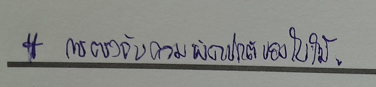

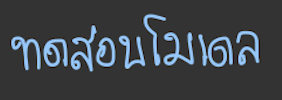

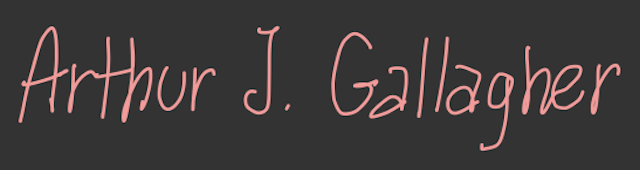

In [ ]:
from PIL import Image

# test image
image = Image.open("handwritting_test.png").convert("RGB")
image2 = Image.open("handwritting_test2.png").convert("RGB")
image3 = Image.open("handwritting_test3.png").convert("RGB")
display(image)
display(image2)
display(image3)

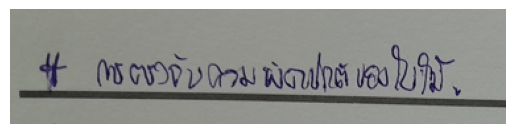

# Ambassadors - What you are


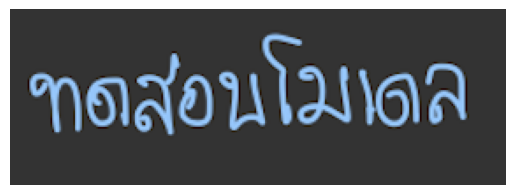

HelpLearn to editCommunity portalRecent changesUpload file


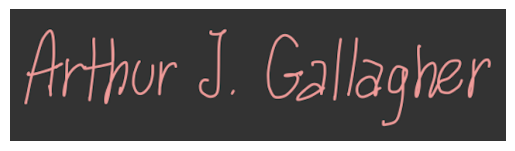

2 1 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000 000


In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

model.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")

In [ ]:
# result = recognize_with_finetuned('handwritting_test.png')
# print("ผลลัพธ์ที่ได้จากภาพ:", result)

## Zero-short: microsoft/trocr-small-handwritten

In [ ]:
test_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 1000
})

In [ ]:
import evaluate
import torch

# modle: microsoft/trocr-small-handwritten

model.eval() # สั่งให้โมเดล เข้าสู่โหมดประเมินผล (evaluation mode)


def predict(item):
    image = item['image'].convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # ช่วยลด memory และเร็วขึ้นเมื่อ inference
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Evaluate on test set
preds, refs = [], []
for item in test_dataset:
    pred = predict(item)
    ref = item["text"]
    refs.append(ref)
    preds.append(pred)

# วัดผล (CER)
cer = evaluate.load("cer")
result = cer.compute(predictions=preds, references=refs)
print(f"CER (Zero-shot): {result}")

CER (Zero-shot): 1.0388228930868006


## Fine-tuning with microsoft/trocr-small-handwritten

In [ ]:
# เพิ่ม token พิเศษเข้า tokenizer
processor.tokenizer.add_tokens(['ๆ', 'ฯ', 'ะ', 'ั', 'า', 'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'เ', 'แ', 'โ', 'ใ', 'ไ', 'ๅ'])

# ปรับขนาด embedding layer ของ decoder ตาม tokenizer ใหม่
model.decoder.resize_token_embeddings(len(processor.tokenizer))

TrOCRScaledWordEmbedding(64015, 256, padding_idx=1)

In [ ]:
for t in ['ๆ', 'ฯ', 'ะ']:
    print(t, processor.tokenizer.convert_tokens_to_ids(t))

ๆ 64002
ฯ 64003
ะ 64004


In [ ]:
# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): DeiTModel(
    (embeddings): DeiTEmbeddings(
      (patch_embeddings): DeiTPatchEmbeddings(
        (projection): Conv2d(3, 384, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DeiTEncoder(
      (layer): ModuleList(
        (0-11): 12 x DeiTLayer(
          (attention): DeiTAttention(
            (attention): DeiTSelfAttention(
              (query): Linear(in_features=384, out_features=384, bias=True)
              (key): Linear(in_features=384, out_features=384, bias=True)
              (value): Linear(in_features=384, out_features=384, bias=True)
            )
            (output): DeiTSelfOutput(
              (dense): Linear(in_features=384, out_features=384, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): DeiTIntermediate(
            (dense): Linear(in_features=384, out_features=1536, bias=True)
        

### Pre-process

In [ ]:
from torchvision import transforms
from PIL import Image

# Data Augmentation
image_augmentations = transforms.Compose([
    transforms.RandomRotation(degrees=5),         # หมุนเล็กน้อย ±5°
    transforms.RandomAffine(degrees=0, translate=(0.05, 0.05), scale=(0.95, 1.05)),  # ยืด/บิดเล็กน้อย
    transforms.ColorJitter(brightness=0.3, contrast=0.3),  # ปรับแสง/ความเข้ม
    transforms.RandomErasing(p=0.1, scale=(0.02, 0.1), ratio=(0.3, 3.3)),  # ลบส่วนเล็กๆ ออก (จำลองรอยเปื้อน)
])

In [ ]:
def preprocess_data(example):
    image = example['image'].convert("RGB")  # แปลงเป็น RGB สำหรับ TrOCR
    image = transforms.ToTensor()(image) # Convert to Tensor before applying transforms

    # augmentation
    image = image_augmentations(image)

    # ปรับขนาดและแปลงภาพ
    pixel_values = processor(images=image, return_tensors="pt").pixel_values[0]

    # Tokenize ข้อความ
    labels = processor.tokenizer(example["text"], return_tensors="pt").input_ids[0]

    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
# ทำ preprocessing ทั้ง training และ testing dataset
train_dataset = train_dataset.map(preprocess_data, remove_columns=train_dataset.column_names)
test_dataset = test_dataset.map(preprocess_data, remove_columns=test_dataset.column_names)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset.features)
print(train_dataset[0]['pixel_values'], train_dataset[0]['labels'])

Output hidden; open in https://colab.research.google.com to view.

### Hyperparameter tuning

In [ ]:
# ตั้งค่า training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="./thai_trocr_model",  # โฟลเดอร์สำหรับบันทึกโมเดล
    per_device_train_batch_size=8,          # ขนาด batch สำหรับฝึก
    per_device_eval_batch_size=8,           # ขนาด batch สำหรับประเมิน
    num_train_epochs=5,                     # จำนวนรอบการฝึก
    learning_rate=5e-5,                     # อัตราการเรียนรู้ (= 0.00005)
    eval_strategy="epoch",                  # ประเมินผลทุกๆ epoch
    save_strategy="epoch",                  # บันทึกโมเดลทุกๆ epoch
    logging_steps=100,                      # บันทึก log ทุก 100 steps
    predict_with_generate=True,             # ใช้ generation สำหรับการทำนายแทนการคาดเดา token โดยตรง
    report_to="none",                       # ปิดการ log ไปยัง wandb
    fp16=True,                              # GPU รองรับ -> ลดหน่วยความจำ ใช้ทรัพยากรได้ดีขึ้น
    metric_for_best_model="cer",            # metric = cer
    dataloader_pin_memory=False,            # Disable pin_memory, preventing the pinning error and ensuring a smoother training process.
)

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Collate Function เป็นฟังก์ชันที่ใช้จัดการข้อมูล แต่ละ batch ก่อนจะป้อนเข้าสู่โมเดล
# โดยเฉพาะเวลาที่ข้อมูลเช่น sequence (ข้อความ) มีความยาวไม่เท่ากัน จะต้อง pad ให้เท่ากันก่อน
def collate_fn(batch):
    # ตรวจสอบว่าทุกๆ pixel_values ใน batch เป็น tensor
    pixel_values = torch.stack([torch.tensor(x["pixel_values"]) for x in batch])
    labels = pad_sequence([torch.tensor(x["labels"]) for x in batch], batch_first=True, padding_value=processor.tokenizer.pad_token_id)

    # เปลี่ยน label ที่เป็น padding ให้เป็น -100 เพื่อให้ loss function ไม่คำนวณ
    labels[labels == processor.tokenizer.pad_token_id] = -100

    return {"pixel_values": pixel_values, "labels": labels}

In [ ]:
import evaluate
cer_metric = evaluate.load("cer")

# Evaluation
# Decode คำตอบที่โมเดลทำนาย
# Decode คำตอบจริง (labels)
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # แปลง label -100 (ignore index) กลับเป็น pad_token_id เพื่อ decode ได้
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id

    # DEBUG: Check for out-of-range token IDs and replace them
    # ป้องกัน token id ที่เกินขอบเขต vocab
    pred_ids = np.clip(pred_ids, 0, processor.tokenizer.vocab_size - 1)
    label_ids = np.clip(label_ids, 0, processor.tokenizer.vocab_size - 1)

    # decode ทั้ง prediction และ label เป็น string
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)

    # คำนวณ CER
    cer = cer_metric.compute(predictions=pred_str, references=label_str)
    return {"cer": cer}

In [ ]:
# สร้าง trainer
trainer = Seq2SeqTrainer(
    model=model,                    # โมเดล TrOCR (VisionEncoderDecoderModel)
    args=training_args,             # การตั้งค่า เช่น epochs, learning rate
    train_dataset=train_dataset,    # ข้อมูลฝึก
    eval_dataset=test_dataset,      # ข้อมูลประเมินผล
    data_collator=collate_fn,       # ใช้ collate_fn
    compute_metrics=compute_metrics # ใช้ evaluation metrics
)

### Debug

In [ ]:
!pip install --upgrade accelerate transformers

In [ ]:
from accelerate import Accelerator

# Create a new Accelerator instance
accelerator = Accelerator()

# Set the accelerator for the trainer
trainer.accelerator = accelerator

### Start Training

In [ ]:
# กำหนด token แรกที่ decoder จะใช้เริ่มต้นการ generate sequence
model.config.decoder_start_token_id = processor.tokenizer.bos_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.eos_token_id = processor.tokenizer.eos_token_id

In [ ]:
# เริ่มฝึกโมเดล
trainer.train()

`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss,Cer
1,2.760100,2.668650,0.890932
2,2.438100,2.295046,0.839958
3,2.147800,1.967054,0.859752
4,2.019000,1.790897,0.875144
5,1.887400,1.732738,0.986394


TrainOutput(global_step=2500, training_loss=2.4360055236816405, metrics={'train_runtime': 7115.1807, 'train_samples_per_second': 2.811, 'train_steps_per_second': 0.351, 'total_flos': 2.392099651584e+18, 'train_loss': 2.4360055236816405, 'epoch': 5.0})

In [ ]:
# !zip -r thai_trocr_model_small.zip ./thai_trocr_model_small
# from google.colab import files
# files.download("thai_trocr_model_small.zip")

  adding: thai_trocr_model_small/ (stored 0%)
  adding: thai_trocr_model_small/checkpoint-1355/ (stored 0%)
  adding: thai_trocr_model_small/checkpoint-1355/preprocessor_config.json (deflated 53%)
  adding: thai_trocr_model_small/checkpoint-1355/model.safetensors (deflated 16%)
  adding: thai_trocr_model_small/checkpoint-1355/optimizer.pt (deflated 32%)
  adding: thai_trocr_model_small/checkpoint-1355/tokenizer_config.json (deflated 75%)
  adding: thai_trocr_model_small/checkpoint-1355/special_tokens_map.json (deflated 52%)
  adding: thai_trocr_model_small/checkpoint-1355/trainer_state.json (deflated 72%)
  adding: thai_trocr_model_small/checkpoint-1355/config.json (deflated 64%)
  adding: thai_trocr_model_small/checkpoint-1355/sentencepiece.bpe.model (deflated 50%)
  adding: thai_trocr_model_small/checkpoint-1355/generation_config.json (deflated 32%)
  adding: thai_trocr_model_small/checkpoint-1355/rng_state.pth (deflated 25%)
  adding: thai_trocr_model_small/checkpoint-1355/training_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Evaluate the Model

In [ ]:
# ประเมินผลด้วย test dataset
results = trainer.evaluate(test_dataset)
print(f"Final CER on test set: {results['eval_cer']:.4f}")

Final CER on test set: 0.9864


In [ ]:
# print(results.keys())

dict_keys(['eval_loss', 'eval_cer', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch'])


In [ ]:
# Save the fine-tuned model and processor
model.save_pretrained("./thai_trocr_finetuned")
processor.save_pretrained("./thai_trocr_finetuned")

[]

### New Section

In [ ]:
ls

dataset_dict.pkl         handwritting_test3.png  thai_trocr_model/
dataset_dict_small2.pkl  handwritting_test.png   TH_TrOCR_Fine_tuned.ipynb
handwritting_test2.png   thai_trocr_finetuned/


In [ ]:
# Load the fine-tuned model and processor
fine_tuned_model = VisionEncoderDecoderModel.from_pretrained("./thai_trocr_finetuned")
fine_tuned_processor = TrOCRProcessor.from_pretrained("./thai_trocr_finetuned")

Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# fine_tuned_model.to(device)

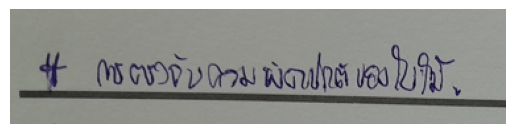

Predicted text: ้                  
ผลลัพธ์ที่ได้จากภาพ handwritting_test.png: ้                  


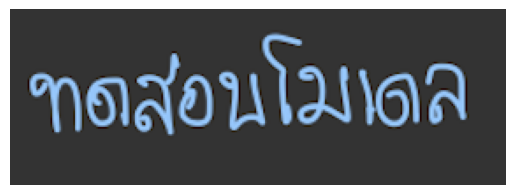

Predicted text: ้                  
ผลลัพธ์ที่ได้จากภาพ handwritting_test2.png: ้                  


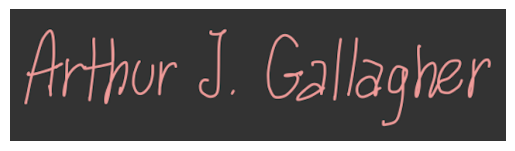

Predicted text: ้                  
ผลลัพธ์ที่ได้จากภาพ handwritting_test3.png: ้                  


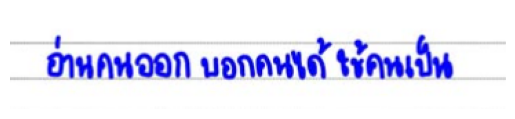

Predicted text: ้         ัย ิไปแลา
ผลลัพธ์ที่ได้จากภาพ handwritting_test4.png: ้         ัย ิไปแลา


In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

fine_tuned_model.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = fine_tuned_processor(image, return_tensors="pt").pixel_values
    generated_ids = fine_tuned_model.generate(pixel_values)
    generated_text = fine_tuned_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png", "handwritting_test4.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(f"ผลลัพธ์ที่ได้จากภาพ {image_path}:", result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")


In [ ]:
test_text = "สวัสดี"
encoded = fine_tuned_processor.tokenizer.encode(test_text, add_special_tokens=False)
decoded = fine_tuned_processor.tokenizer.decode(encoded)
print("Encoded:", encoded)
print("Decoded:", decoded)

Encoded: [190, 63332, 63365, 63414, 190, 63332, 63909, 64006]
Decoded: สวั สดี


#  Model: openthaigpt/thai-trocr

In [ ]:
# Load model and processor
model_name = "openthaigpt/thai-trocr"
thai_processor = TrOCRProcessor.from_pretrained(model_name)
thai_model = VisionEncoderDecoderModel.from_pretrained(model_name)

preprocessor_config.json:   0%|          | 0.00/364 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.85k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/906k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.18M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.92k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/411M [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.electra.modeling_electra.ElectraForCausalLM'> is overwritten by shared decoder config: ElectraConfig {
  "add_cross_attention": true,
  "architectures": [
    "ElectraModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "gelu",
  "hidden_dropo

generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

### Load dataset

In [ ]:
from datasets import load_dataset

ds = load_dataset("iapp/thai_handwriting_dataset", split="train[:5000]")

# แบ่ง train/test โดยใช้ 80-20
split_ds = ds.train_test_split(test_size=0.2, seed=42)

train_ds = split_ds["train"]
test_ds = split_ds["test"]

print(f"Train size: {len(train_ds)}")
print(f"Test size: {len(test_ds)}")

Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

Train size: 4000
Test size: 1000


In [ ]:
train_ds

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 4000
})

## Zero-short: openthaigpt/thai-trocr

In [ ]:
import evaluate

# modle: openthaigpt/thai-trocr

thai_model.eval() # สั่งให้โมเดล เข้าสู่โหมดประเมินผล (evaluation mode)

import torch

# Evaluate on test set
preds, refs = [], []
for item in test_ds:
    # Prepare image
    image = item['image'].convert("RGB")
    pixel_values = thai_processor(image, return_tensors="pt").pixel_values

    # Generate prediction
    generated_ids = thai_model.generate(pixel_values)
    # Decode
    generated_text = thai_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    preds.append(generated_text)
    refs.append(item['text'])

# วัดผล (CER)
cer = evaluate.load("cer")
result = cer.compute(predictions=preds, references=refs)
print(f"CER (Zero-shot-thai-trocr): {result}")

CER (Zero-shot-thai-trocr): 0.8489352751457361


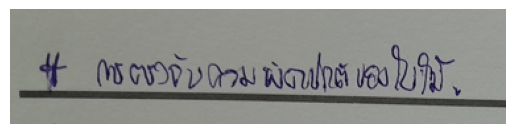

ผลลัพธ์ที่ได้จากภาพ handwritting_test.png: ="# พิชิตก้องมวณ เอดินบะระปัสะ


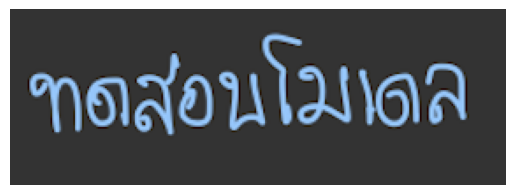

ผลลัพธ์ที่ได้จากภาพ handwritting_test2.png: ทดสอบโมดล


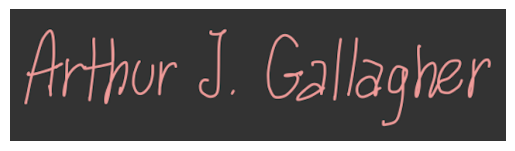

ผลลัพธ์ที่ได้จากภาพ handwritting_test3.png: frthur J. Gallagher


In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

thai_model.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = thai_processor(image, return_tensors="pt").pixel_values
    generated_ids = thai_model.generate(
        pixel_values,
        max_length=128,
        num_beams=4,
        early_stopping=True
    )
    generated_text = thai_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(f"ผลลัพธ์ที่ได้จากภาพ {image_path}:", result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")

# Model: microsoft/trocr-base-handwritten

In [ ]:
!pip install transformers datasets torch pillow matplotlib evaluate accelerate
!pip install jiwer

In [ ]:
import torch
from transformers import VisionEncoderDecoderModel, TrOCRProcessor, TrainingArguments, Trainer
from datasets import load_dataset, Dataset
from sklearn.model_selection import train_test_split
from PIL import Image
import evaluate

### Load dataset

In [ ]:
from datasets import load_dataset

dataset = load_dataset("iapp/thai_handwriting_dataset", split="train[:1000]")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/101 [00:00<?, ?it/s]

train-0000.parquet:   0%|          | 0.00/281M [00:00<?, ?B/s]

train-0001.parquet:   0%|          | 0.00/88.7M [00:00<?, ?B/s]

train-0002.parquet:   0%|          | 0.00/91.2M [00:00<?, ?B/s]

train-0003.parquet:   0%|          | 0.00/83.0M [00:00<?, ?B/s]

train-0004.parquet:   0%|          | 0.00/76.5M [00:00<?, ?B/s]

train-0005.parquet:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

train-0006.parquet:   0%|          | 0.00/82.1M [00:00<?, ?B/s]

train-0007.parquet:   0%|          | 0.00/76.7M [00:00<?, ?B/s]

train-0008.parquet:   0%|          | 0.00/88.6M [00:00<?, ?B/s]

train-0009.parquet:   0%|          | 0.00/87.6M [00:00<?, ?B/s]

train-0010.parquet:   0%|          | 0.00/74.2M [00:00<?, ?B/s]

train-0011.parquet:   0%|          | 0.00/98.2M [00:00<?, ?B/s]

train-0012.parquet:   0%|          | 0.00/91.2M [00:00<?, ?B/s]

train-0013.parquet:   0%|          | 0.00/90.5M [00:00<?, ?B/s]

train-0014.parquet:   0%|          | 0.00/89.6M [00:00<?, ?B/s]

train-0015.parquet:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

train-0016.parquet:   0%|          | 0.00/80.2M [00:00<?, ?B/s]

train-0017.parquet:   0%|          | 0.00/83.8M [00:00<?, ?B/s]

train-0018.parquet:   0%|          | 0.00/77.0M [00:00<?, ?B/s]

train-0019.parquet:   0%|          | 0.00/99.9M [00:00<?, ?B/s]

train-0020.parquet:   0%|          | 0.00/91.8M [00:00<?, ?B/s]

train-0021.parquet:   0%|          | 0.00/88.8M [00:00<?, ?B/s]

train-0022.parquet:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

train-0023.parquet:   0%|          | 0.00/80.4M [00:00<?, ?B/s]

train-0024.parquet:   0%|          | 0.00/85.6M [00:00<?, ?B/s]

train-0025.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

train-0026.parquet:   0%|          | 0.00/85.5M [00:00<?, ?B/s]

train-0027.parquet:   0%|          | 0.00/82.9M [00:00<?, ?B/s]

train-0028.parquet:   0%|          | 0.00/78.1M [00:00<?, ?B/s]

train-0029.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

train-0030.parquet:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

train-0031.parquet:   0%|          | 0.00/84.3M [00:00<?, ?B/s]

train-0032.parquet:   0%|          | 0.00/81.9M [00:00<?, ?B/s]

train-0033.parquet:   0%|          | 0.00/80.8M [00:00<?, ?B/s]

train-0034.parquet:   0%|          | 0.00/81.8M [00:00<?, ?B/s]

train-0035.parquet:   0%|          | 0.00/106M [00:00<?, ?B/s]

train-0036.parquet:   0%|          | 0.00/93.3M [00:00<?, ?B/s]

train-0037.parquet:   0%|          | 0.00/81.1M [00:00<?, ?B/s]

train-0038.parquet:   0%|          | 0.00/76.3M [00:00<?, ?B/s]

train-0039.parquet:   0%|          | 0.00/85.4M [00:00<?, ?B/s]

train-0040.parquet:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

train-0041.parquet:   0%|          | 0.00/83.2M [00:00<?, ?B/s]

train-0042.parquet:   0%|          | 0.00/84.6M [00:00<?, ?B/s]

train-0043.parquet:   0%|          | 0.00/109M [00:00<?, ?B/s]

train-0044.parquet:   0%|          | 0.00/79.7M [00:00<?, ?B/s]

train-0045.parquet:   0%|          | 0.00/80.8M [00:00<?, ?B/s]

train-0046.parquet:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

train-0047.parquet:   0%|          | 0.00/80.0M [00:00<?, ?B/s]

train-0048.parquet:   0%|          | 0.00/90.6M [00:00<?, ?B/s]

train-0049.parquet:   0%|          | 0.00/98.4M [00:00<?, ?B/s]

train-0050.parquet:   0%|          | 0.00/103M [00:00<?, ?B/s]

train-0051.parquet:   0%|          | 0.00/100M [00:00<?, ?B/s]

train-0052.parquet:   0%|          | 0.00/83.9M [00:00<?, ?B/s]

train-0053.parquet:   0%|          | 0.00/93.9M [00:00<?, ?B/s]

train-0054.parquet:   0%|          | 0.00/86.8M [00:00<?, ?B/s]

train-0055.parquet:   0%|          | 0.00/80.2M [00:00<?, ?B/s]

train-0056.parquet:   0%|          | 0.00/73.7M [00:00<?, ?B/s]

train-0057.parquet:   0%|          | 0.00/77.2M [00:00<?, ?B/s]

train-0058.parquet:   0%|          | 0.00/94.4M [00:00<?, ?B/s]

train-0059.parquet:   0%|          | 0.00/79.2M [00:00<?, ?B/s]

train-0060.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0061.parquet:   0%|          | 0.00/87.5M [00:00<?, ?B/s]

train-0062.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-0063.parquet:   0%|          | 0.00/93.1M [00:00<?, ?B/s]

train-0064.parquet:   0%|          | 0.00/95.5M [00:00<?, ?B/s]

train-0065.parquet:   0%|          | 0.00/82.9M [00:00<?, ?B/s]

train-0066.parquet:   0%|          | 0.00/81.2M [00:00<?, ?B/s]

train-0067.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0068.parquet:   0%|          | 0.00/89.9M [00:00<?, ?B/s]

train-0069.parquet:   0%|          | 0.00/84.7M [00:00<?, ?B/s]

train-0070.parquet:   0%|          | 0.00/95.4M [00:00<?, ?B/s]

train-0071.parquet:   0%|          | 0.00/89.3M [00:00<?, ?B/s]

train-0072.parquet:   0%|          | 0.00/88.2M [00:00<?, ?B/s]

train-0073.parquet:   0%|          | 0.00/89.4M [00:00<?, ?B/s]

train-0074.parquet:   0%|          | 0.00/88.7M [00:00<?, ?B/s]

train-0075.parquet:   0%|          | 0.00/84.4M [00:00<?, ?B/s]

train-0076.parquet:   0%|          | 0.00/86.2M [00:00<?, ?B/s]

train-0077.parquet:   0%|          | 0.00/86.6M [00:00<?, ?B/s]

train-0078.parquet:   0%|          | 0.00/84.5M [00:00<?, ?B/s]

train-0079.parquet:   0%|          | 0.00/81.5M [00:00<?, ?B/s]

train-0080.parquet:   0%|          | 0.00/94.7M [00:00<?, ?B/s]

train-0081.parquet:   0%|          | 0.00/96.2M [00:00<?, ?B/s]

train-0082.parquet:   0%|          | 0.00/89.6M [00:00<?, ?B/s]

train-0083.parquet:   0%|          | 0.00/77.4M [00:00<?, ?B/s]

train-0084.parquet:   0%|          | 0.00/101M [00:00<?, ?B/s]

train-0085.parquet:   0%|          | 0.00/70.9M [00:00<?, ?B/s]

train-0086.parquet:   0%|          | 0.00/84.1M [00:00<?, ?B/s]

train-0087.parquet:   0%|          | 0.00/89.5M [00:00<?, ?B/s]

train-0088.parquet:   0%|          | 0.00/104M [00:00<?, ?B/s]

train-0089.parquet:   0%|          | 0.00/78.3M [00:00<?, ?B/s]

train-0090.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

train-0091.parquet:   0%|          | 0.00/79.5M [00:00<?, ?B/s]

train-0092.parquet:   0%|          | 0.00/102M [00:00<?, ?B/s]

train-0093.parquet:   0%|          | 0.00/93.9M [00:00<?, ?B/s]

train-0094.parquet:   0%|          | 0.00/99.3M [00:00<?, ?B/s]

train-0095.parquet:   0%|          | 0.00/93.0M [00:00<?, ?B/s]

train-0096.parquet:   0%|          | 0.00/107M [00:00<?, ?B/s]

train-0097.parquet:   0%|          | 0.00/108M [00:00<?, ?B/s]

train-0098.parquet:   0%|          | 0.00/105M [00:00<?, ?B/s]

train-0099.parquet:   0%|          | 0.00/82.1M [00:00<?, ?B/s]

train-0100.parquet:   0%|          | 0.00/85.1M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
# แบ่ง train/test โดยใช้ 80-20
split_dataset = dataset.train_test_split(test_size=0.2, seed=42)

train_dataset = split_dataset["train"]
test_dataset = split_dataset["test"]

print(f"Train size: {len(train_dataset)}")
print(f"Test size: {len(test_dataset)}")

Train size: 800
Test size: 200


In [ ]:
from transformers import TrOCRProcessor

# โหลด processor และ tokenizer
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-base-handwritten')

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## Zero-shot

In [ ]:
test_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 200
})

In [ ]:
import evaluate
import torch

# modle: microsoft/trocr-small-handwritten

model.eval() # สั่งให้โมเดล เข้าสู่โหมดประเมินผล (evaluation mode)


def predict(item):
    image = item['image'].convert("RGB")
    pixel_values = processor(images=image, return_tensors="pt").pixel_values

    # ช่วยลด memory และเร็วขึ้นเมื่อ inference
    with torch.no_grad():
        generated_ids = model.generate(pixel_values)
    return processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Evaluate on test set
preds, refs = [], []
for item in test_dataset:
    pred = predict(item)
    ref = item["text"]
    refs.append(ref)
    preds.append(pred)

# วัดผล (CER)
cer = evaluate.load("cer")
result = cer.compute(predictions=preds, references=refs)
print(f"CER (Zero-shot) base: {result}")

CER (Zero-shot) base: 1.1428571428571428


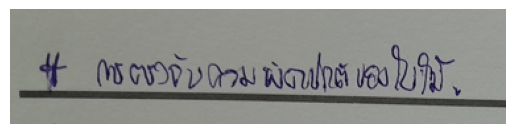

ผลลัพธ์ที่ได้จากภาพ handwritting_test.png: It monoivous machines earlier .


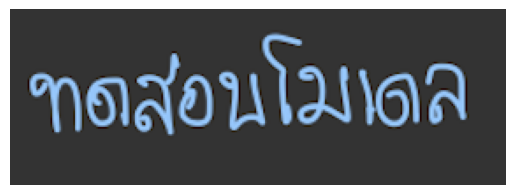

ผลลัพธ์ที่ได้จากภาพ handwritting_test2.png: modallion .


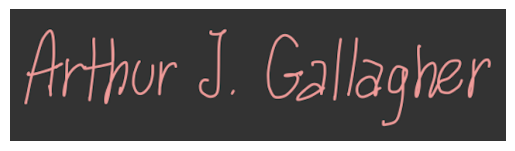

ผลลัพธ์ที่ได้จากภาพ handwritting_test3.png: Arthur J. Gallagher


In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

model.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = processor(image, return_tensors="pt").pixel_values
    generated_ids = model.generate(
        pixel_values,
        max_length=128,
        num_beams=4,
        early_stopping=True
    )
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(f"ผลลัพธ์ที่ได้จากภาพ {image_path}:", result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")

## Fine-tuned

In [ ]:
train_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 800
})

### ปรับแต่ง Tokenizer และ Processor

In [ ]:
from PIL import Image
import requests

# load image from the IAM database
url = 'https://fki.tic.heia-fr.ch/static/img/a01-122-02-00.jpg'
image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]


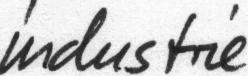

In [ ]:
image

In [ ]:
generated_text

'indus the'

In [ ]:
tokenizer = processor.tokenizer

# เพิ่ม token ภาษาไทย
thai_texts = list(set(train_dataset["text"]))  # ใช้ข้อความจาก train dataset
tokenizer.add_tokens(thai_texts)

267

In [ ]:
# เพิ่ม token พิเศษเข้า tokenizer
tokenizer.add_tokens(['ๆ', 'ฯ', 'ะ', 'ั', 'า', 'ำ', 'ิ', 'ี', 'ึ', 'ื', 'ุ', 'ู', 'เ', 'แ', 'โ', 'ใ', 'ไ', 'ๅ'])

18

In [ ]:
# ปรับขนาด token embeddings
model.decoder.resize_token_embeddings(len(tokenizer))

# ตั้งค่า config สำหรับภาษาไทย
model.config.decoder_start_token_id = tokenizer.bos_token_id
model.config.eos_token_id = tokenizer.eos_token_id
model.config.pad_token_id = tokenizer.pad_token_id
model.config.vocab_size = len(tokenizer)

In [ ]:
# ตรวจสอบ config
print(f"Decoder start token ID: {model.config.decoder_start_token_id}")
print(f"EOS token ID: {model.config.eos_token_id}")
print(f"Pad token ID: {model.config.pad_token_id}")

Decoder start token ID: 0
EOS token ID: 2
Pad token ID: 1


### Preprocess

In [ ]:
train_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 800
})

In [ ]:
from torchvision import transforms

# กำหนด Data Augmentation
train_augmentations = transforms.Compose([
    transforms.RandomRotation(degrees=10),  # หมุนภาพ ±10 องศา
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),  # ปรับแสงและสี
    transforms.GaussianBlur(kernel_size=3),  # เพิ่มความเบลอเล็กน้อย
    transforms.RandomAffine(degrees=5, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # ปรับมุมและขนาด
    transforms.ElasticTransform(alpha=50.0),  # บิดภาพเล็กน้อย
])

In [ ]:
train_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 800
})

In [ ]:
# Preprocess ชุดข้อมูล
def preprocess_data(example):
    image = example['image'].convert("RGB")  # แปลงเป็น RGB สำหรับ TrOCR

    # augmentation
    image = train_augmentations(image)
    image = transforms.ToTensor()(image) # Convert to Tensor before applying transforms

    # ปรับขนาดและแปลงภาพ
    pixel_values = processor(images=image, return_tensors="pt").pixel_values[0]

    # Tokenize ข้อความ
    labels = processor.tokenizer(example["text"], return_tensors="pt").input_ids[0]

    return {"pixel_values": pixel_values, "labels": labels}

# ใช้ preprocess กับ dataset
train_dataset_embed = train_dataset.map(preprocess_data, remove_columns=train_dataset.column_names)
test_dataset_embed = test_dataset.map(preprocess_data, remove_columns=test_dataset.column_names)

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset_embed.features)
print(train_dataset_embed[0]['pixel_values'], train_dataset_embed[0]['labels'])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ตั้งค่า format สำหรับ PyTorch
# train_dataset_embed.set_format("torch")
# test_dataset_embed.set_format("torch")

### ตั้งค่า Hyperparameters และ Training Arguments

In [ ]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

training_args = Seq2SeqTrainingArguments(
    output_dir="./thai_trocr_finetuned_2",
    num_train_epochs=10,  # จำนวน epoch ที่เหมาะสม
    per_device_train_batch_size=8,  # ขนาด batch สำหรับ GPU
    per_device_eval_batch_size=8,
    learning_rate=5e-5,  # Learning rate สำหรับ fine-tuning
    warmup_steps=500,  # Warmup เพื่อ stabilize การเทรน
    weight_decay=0.01,  # ป้องกัน overfitting
    eval_strategy="epoch",  # วัดผลทุก epoch
    save_strategy="epoch",  # บันทึกทุก epoch
    load_best_model_at_end=True,  # เลือกโมเดลที่ดีที่สุด
    metric_for_best_model="cer", # ใช้ CER เป็นเกณฑ์เลือกโมเดลที่ดีที่สุด
    greater_is_better=False,  # CER ยิ่งต่ำยิ่งดี
    logging_steps=100,  # Log ทุก 100 steps
    fp16=True,  # ใช้ mixed precision เพื่อเพิ่มความเร็ว
    dataloader_num_workers=4,  # ใช้ multi-threading เพื่อโหลดข้อมูลเร็วขึ้น
    report_to="none",                  # ปิดการ log ไปยัง wandb
    dataloader_pin_memory=False, # Disable pin_memory, preventing the pinning error and ensuring a smoother training process.
    gradient_accumulation_steps=2, # Accumulate gradients
)

In [ ]:
import evaluate
import numpy as np

cer_metric = evaluate.load("cer")

# Evaluation
# Decode คำตอบที่โมเดลทำนาย
# Decode คำตอบจริง (labels)
def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # แปลง label -100 (ignore index) กลับเป็น pad_token_id เพื่อ decode ได้
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id

    # Pad the predicted IDs to have the same length
    # find the maximum length
    max_length = max(len(ids) for ids in pred_ids)
    # pad all sequences to the maximum length
    pred_ids_padded = [
        ids + [processor.tokenizer.pad_token_id] * (max_length - len(ids))
        for ids in pred_ids
    ]

    # Convert to NumPy array
    pred_ids = np.array(pred_ids_padded)

    # DEBUG: Check for out-of-range token IDs and replace them
    # ป้องกัน token id ที่เกินขอบเขต vocab
    pred_ids = np.clip(pred_ids, 0, processor.tokenizer.vocab_size - 1)
    label_ids = np.clip(label_ids, 0, processor.tokenizer.vocab_size - 1)

    # decode ทั้ง prediction และ label เป็น string
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)

    # คำนวณ CER
    cer = cer_metric.compute(predictions=pred_str, references=label_str)
    return {"cer": cer}

In [ ]:
import torch
from torch.nn.utils.rnn import pad_sequence

# Collate Function เป็นฟังก์ชันที่ใช้จัดการข้อมูล แต่ละ batch ก่อนจะป้อนเข้าสู่โมเดล
# โดยเฉพาะเวลาที่ข้อมูลเช่น sequence (ข้อความ) มีความยาวไม่เท่ากัน จะต้อง pad ให้เท่ากันก่อน
def collate_fn(batch):
    # ตรวจสอบว่าทุกๆ pixel_values ใน batch เป็น tensor
    pixel_values = torch.stack([torch.tensor(x["pixel_values"]) for x in batch])
    labels = pad_sequence([torch.tensor(x["labels"]) for x in batch], batch_first=True, padding_value=processor.tokenizer.pad_token_id)

    # เปลี่ยน label ที่เป็น padding ให้เป็น -100 เพื่อให้ loss function ไม่คำนวณ
    labels[labels == processor.tokenizer.pad_token_id] = -100

    return {"pixel_values": pixel_values, "labels": labels}

### Fine-Tuning

In [ ]:
from transformers.trainer_callback import EarlyStoppingCallback

# create trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_embed,
    eval_dataset=test_dataset_embed,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(
        early_stopping_patience=2,  # หยุดถ้า CER ไม่ลดลงหลัง 2 epoch
        early_stopping_threshold=0.0  # ดีขึ้นเล็กน้อยก็ถือว่าดี
    )],
)

In [ ]:
# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

In [ ]:
# กำหนด token แรกที่ decoder จะใช้เริ่มต้นการ generate sequence
model.config.decoder_start_token_id = processor.tokenizer.bos_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.eos_token_id = processor.tokenizer.eos_token_id

In [ ]:
# เริ่ม fine-tuning
trainer.train()

Epoch,Training Loss,Validation Loss


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.92 GiB. GPU 0 has a total capacity of 14.74 GiB of which 1.89 GiB is free. Process 7672 has 12.85 GiB memory in use. Of the allocated memory 9.48 GiB is allocated by PyTorch, and 3.23 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

### evaluate

In [ ]:
# ประเมินผลด้วย test dataset
results = trainer.evaluate(test_dataset)
print(f"Final CER on test set: {results['eval_cer']:.4f}")

In [ ]:
# บันทึกโมเดล
model.save_pretrained("./thai_trocr_finetuned_base")
processor.save_pretrained("./thai_trocr_finetuned_base")
tokenizer.save_pretrained("./thai_trocr_finetuned_base")

In [ ]:
# Load the fine-tuned model and processor
fine_tuned_model = VisionEncoderDecoderModel.from_pretrained("./thai_trocr_finetuned_base")
fine_tuned_processor = TrOCRProcessor.from_pretrained("./thai_trocr_finetuned_base")

In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

fine_tuned_model.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = fine_tuned_processor(image, return_tensors="pt").pixel_values
    generated_ids = fine_tuned_model.generate(pixel_values)
    generated_text = fine_tuned_processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png", "handwritting_test4.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(f"ผลลัพธ์ที่ได้จากภาพ {image_path}:", result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")


# Model: microsoft/trocr-large-handwritten

In [ ]:
processor_large = TrOCRProcessor.from_pretrained('microsoft/trocr-large-handwritten')
model_large = VisionEncoderDecoderModel.from_pretrained('microsoft/trocr-large-handwritten')

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 1024,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 16,
  "num_channels": 3,
  "num_hidden_layers": 24,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 1024,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 1024,
  "d_

In [ ]:
test_dataset

Dataset({
    features: ['image', 'text', 'label_file'],
    num_rows: 200
})

In [ ]:
import evaluate
import torch

# modle: microsoft/trocr-small-handwritten

model_large.eval() # สั่งให้โมเดล เข้าสู่โหมดประเมินผล (evaluation mode)


def predict(item):
    image = item['image'].convert("RGB")
    pixel_values = processor_large(images=image, return_tensors="pt").pixel_values

    # ช่วยลด memory และเร็วขึ้นเมื่อ inference
    with torch.no_grad():
        generated_ids = model_large.generate(pixel_values)
    return processor_large.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Evaluate on test set
preds, refs = [], []
for item in test_dataset:
    pred = predict(item)
    ref = item["text"]
    refs.append(ref)
    preds.append(pred)

# วัดผล (CER)
cer = evaluate.load("cer")
result = cer.compute(predictions=preds, references=refs)
print(f"CER (Zero-shot) large: {result}")

CER (Zero-shot) large: 1.0862337662337662


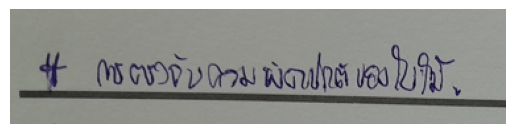

ผลลัพธ์ที่ได้จากภาพ handwritting_test.png: # necessary manufacturer was kept .


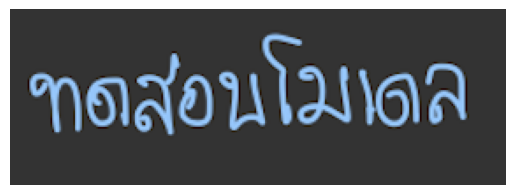

ผลลัพธ์ที่ได้จากภาพ handwritting_test2.png: noatoufauna .


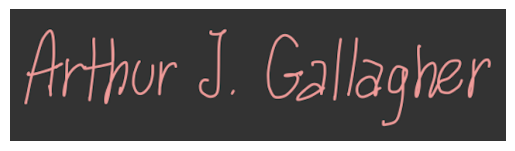

ผลลัพธ์ที่ได้จากภาพ handwritting_test3.png: Arthur J. Gallagher .


In [ ]:
# Testing with my image
from PIL import Image
import torch
import matplotlib.pyplot as plt

model_large.eval()

def recognize_with_finetuned(image_path):
    """
    Recognize text using your fine-tuned model
    """
    image = Image.open(image_path).convert("RGB")

    # Display image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Preprocess and predict
    pixel_values = processor_large(image, return_tensors="pt").pixel_values
    generated_ids = model_large.generate(
        pixel_values,
        max_length=128,
        num_beams=4,
        early_stopping=True
    )
    generated_text = processor_large.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # print(f"Predicted text: {generated_text}")

    return generated_text

image_paths = ["handwritting_test.png", "handwritting_test2.png", "handwritting_test3.png"]
for image_path in image_paths:
    try:
        result = recognize_with_finetuned(image_path)
        print(f"ผลลัพธ์ที่ได้จากภาพ {image_path}:", result)
    except FileNotFoundError:
        print(f"Error: Image file not found: {image_path}")

# Comparison of All Approaches

In [ ]:
def evaluate_model(dataset, num_samples=None):
    """
    Evaluate the model on a dataset and compute CER
    """
    cer_metric = evaluate.load("cer")
    if num_samples:
        dataset = dataset.select(range(num_samples))

    predictions = []
    references = []

    for item in dataset:
        # Prepare image
        image = item['image'].convert("RGB")
        pixel_values = processor(image, return_tensors="pt").pixel_values.to(device)

        # Generate prediction
        generated_ids = model.generate(pixel_values)
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

        predictions.append(generated_text)
        references.append(item['text'])

    # Compute CER
    cer = cer_metric.compute(predictions=predictions, references=references)
    return cer, predictions, references

In [ ]:
# Compare all three approaches
approaches = {
    "TrOCR Base (Zero-shot)": "microsoft/trocr-base-handwritten",
    "TrOCR Fine-tuned": "./thai_trocr_finetuned",
    "OpenThaiGPT TrOCR": "openthaigpt/thai-trocr",
}

results = {}
for name, model_path in approaches.items():
    print(f"\nEvaluating {name}...")

    # Load model
    processor = TrOCRProcessor.from_pretrained(model_path)
    model = VisionEncoderDecoderModel.from_pretrained(model_path).to(device)

    # Evaluate on a subset of test set for faster comparison (100 samples)
    cer, _, _ = evaluate_model(test_ds)
    results[name] = cer
    print(f"{name} CER: {cer:.4f}")

# Display comparison results
print("\nComparison of Approaches:")
for name, cer in results.items():
    print(f"{name}: CER = {cer:.4f}")


Evaluating TrOCR Base (Zero-shot)...


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

TrOCR Base (Zero-shot) CER: 1.1429

Evaluating TrOCR Fine-tuned...


Config of the encoder: <class 'transformers.models.deit.modeling_deit.DeiTModel'> is overwritten by shared encoder config: DeiTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 384,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 1536,
  "layer_norm_eps": 1e-12,
  "model_type": "deit",
  "num_attention_heads": 6,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 384,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "relu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 384,
  "d_

TrOCR Fine-tuned CER: 0.9912

Evaluating OpenThaiGPT TrOCR...


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.electra.modeling_electra.ElectraForCausalLM'> is overwritten by shared decoder config: ElectraConfig {
  "add_cross_attention": true,
  "architectures": [
    "ElectraModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "gelu",
  "hidden_dropo

OpenThaiGPT TrOCR CER: 0.6888

Evaluating OpenThaiGPT Fine-tuned...


Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.electra.modeling_electra.ElectraForCausalLM'> is overwritten by shared decoder config: ElectraConfig {
  "add_cross_attention": true,
  "architectures": [
    "ElectraModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "embedding_size": 128,
  "hidden_act": "gelu",
  "hidden_dropo

OpenThaiGPT Fine-tuned CER: 0.7148

Comparison of Approaches:
TrOCR Base (Zero-shot): CER = 1.1429
TrOCR Fine-tuned: CER = 0.9912
OpenThaiGPT TrOCR: CER = 0.6888
OpenThaiGPT Fine-tuned: CER = 0.7148


# example

- https://huggingface.co/spaces/Aekanun/Thai-HandWriting-to-Text

- https://huggingface.co/spaces/Riksarkivet/htr_demo